In [2]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from matplotlib.patches import Rectangle

% matplotlib inline

In [31]:
length = 9 # choose between 8, 9 12 and 13

signal = 'dIm EP Peptide'
# signal = 'dIm EP Streptavidin'

# convert dIm (rad) to Gamma (g/cm^2)
dIm_to_gamma = 1.59245 * 10**-4

aggregated_file = '18 EP dIm and dR Signals aggregated.csv'

# Base peptide sequences

In [32]:
if   length == 8:
    base = 'WTHPQFAT'
elif length == 9:
    base = 'LQWHPQAGK'
elif length == 12:
    base = 'GKFPIPLGKQSG'
elif length == 13:
    base = 'NGQFQVWIPGAQK'
else:
    print 'No base of such length'
    
aminoacids = ['A', 'C', 'D', 'E', 'F',
              'G', 'H', 'I', 'K', 'L',
              'M', 'N', 'P', 'Q', 'R',
              'S', 'T', 'V', 'W', 'Y']

# Creating list of peptide names

In [5]:
def namelist(base, n):
    names = []
    for a in aminoacids:
        names.append(base[:n - 1] + a + base[n:])
    return names

# Subsetting data

In [6]:
def reorder(data, names):
    # moves base peptide row to the first position
    base_index = data[data['Peptide'] == base].index[0]
    reindex = [-1 if x == base_index else x for x in data.index]
    data.index = reindex
    data = data.sort_index()
    return data

In [7]:
def rename(data, base, n):
    names = data['Peptide']
    new_names = []
    for name in names:
        if name == base:
            new_names.append(name)
        else:
            new_names.append('-'*(n - 1) + name[n-1] + '-'*(len(base)-n))
    data['Peptide'] = new_names
    return data

In [15]:
def subset(base, n):
    names = namelist(base, n)
    data = pd.read_csv(aggregated_file, header = 0)
    data = data[data['Peptide Length'] == len(base)]
    data = data[data['Peptide'].isin(names)]
    assert len(data) == 20
#     data = reorder(data, names)
    data = rename(data, base, n)
    return data

In [28]:
def plot_series(data, n, signal, filename):
    
    # creating numerical arrays for data and errorbars

    x         = np.array(data[signal + ' Mean NN'])
    xbar_hi   = np.array(data[signal + ' SE'])
    
    # rescale
    x       = [e * dIm_to_gamma * 10**7 for e in x]
    xbar_hi = [e * dIm_to_gamma * 10**7 for e in xbar_hi]
    xbar_lo = xbar_hi[:]
    
    for i in range(len(x)):
        if x[i] - xbar_lo[i] < 0:
            xbar_lo[i] = x[i]
    
    ylabels = data['Peptide'].tolist()
    y       = range(len(ylabels), 0, -1)

    # start plotting
    
    width = 6
    height = 0.36 * (len(y) + 1.4) + 1.1

    fig = plt.figure(figsize = (width, height))
    
    if signal == 'dIm EP Peptide':
        plt.xlim(left = 0, right = 8.0)
        xticks = range(0, 9, 2)
    elif signal == 'dIm EP Streptavidin':
        plt.xlim(left = 0, right = 4.0)
        xticks = range(0, 5)
        
    plt.ylim(bottom = min(y) - 0.7, top = max(y) + 0.7)
    
    plt.yticks(y, ylabels)
    plt.grid(alpha = 0.5)

    plt.subplots_adjust(left = 2.5 / width,
                        right = 1 - 0.3 / width,
                        bottom = 0.8 / height,
                        top = 1 - 0.3 / height)

    # plot data
    
    ax = fig.add_subplot(1, 1, 1)

    ax.errorbar(x, y, xerr = [xbar_lo, xbar_hi],

                color      = 'k',
                marker     = 'None',
                markersize = 6,
                capthick   = 2,
                linewidth  = 2,
                capsize    = 4,
                ls = 'none',
                markeredgecolor = 'none')
 
    plt.xticks(xticks)
    
    # x axis labels
    for label in ax.get_xticklabels(): 
        label.set_fontname('DejaVu Sans Mono')
        label.set_fontsize(36)

    # y axis labels
    for label in ax.get_yticklabels():
        label.set_fontname('DejaVu Sans Mono') # alternatively: 'Droid Sans Mono', 'FreeMono' or 'Liberation Mono'
        label.set_fontsize(30)

#         if label.get_text() == base:
#             label.set_weight('black')
#         else:
#             label.set_color('0.2')

        # axis ticks
        for tick in ax.get_xaxis().get_major_ticks():
            tick.set_pad(6)
        for tick in ax.get_yaxis().get_major_ticks():
            tick.set_pad(4)

#     plt.show()
    plt.savefig(filename)     

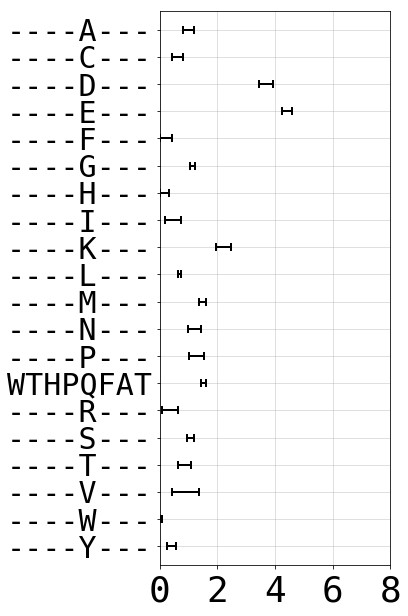

In [29]:
n = 5
plot_series(subset(base, n), n, signal, 'a')

# Plotting

In [33]:
for i in range(1, length + 1):
    filename = 'base ' + str(length) + ', letter ' + str(i) + '.png'
    data = subset(base, i)
    plot_series(data, i, signal, filename)
    
plt.clf()
plt.close('all')

In [127]:
# for i in range(1, length + 1):
#     data = subset(base, i)
#     maxG = (data['Streptavidin Mean NN']).max() * dIm_to_gamma * 10**7
#     minG = (data['Streptavidin Mean NN']).min() * dIm_to_gamma * 10**7
#     print 'residue position =', n
#     print 'max Gamma', maxG
#     print 'min Gamma', minG
#     print 'ratio =', maxG / minG, '\n'